In [1]:
# Imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Charger et trier les données
data = pd.read_csv("test_2017.csv", sep=';')
test = pd.read_csv("test_2022.csv", sep=';')
display(data)
X = data.drop(["Region", "Code_region", "Candidat",'Taux_Voix_Exp'], axis=1)
X_test = test.drop(["Region", "Code_region", "Candidat", "Taux_Voix_Exp"], axis=1)

regions = ['Auvergne-Rhone-Alpes','Bourgogne-Franche-Comte' ,'Bretagne','Centre-Val de Loire','Corse','Grand Est','Hauts-de-France', 'Ile-de-France',  'Normandie', 'Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire', 'Provence-Alpes-Cote d\'Azur']
labels = ['Taux_Voix_Exp']
candidats = ["Candidat"]

y1 = data[labels].values
y2 = data[candidats].values

y1_test = test[labels].values
y2_test = test[candidats].values
#display(X)





,Code_region,Region,Nombre_de_menages_fiscaux,Part_des_menages_fiscaux_imposes,Mediane_du_revenu_disponible_par_unite_de_consommation,Taux_de_pauvrete,Inscrits,Abstentions,Votants,Blancs,Nuls,Exprimes,Candidat,Voix,Taux_Voix_Ins,Taux_Voix_Exp
0,84,Auvergne-Rhone-Alpes,3360029,52.7,21840,12.5,5417395,1119368,4298027,75604,32898,4189525,MACRON Emmanuel,1026414,18.946634,24.499530
1,27,Bourgogne-Franche-Comte,1223240,50.6,20860,12.8,2001703,412943,1588760,31110,12765,1544885,LE PEN Marine,387661,19.366560,25.093195
2,53,Bretagne,1456371,49.5,21060,10.9,2453684,405089,2048595,34310,13962,2000323,MACRON Emmanuel,581075,23.681738,29.049059
3,24,Centre-Val de Loire,1120490,51.1,20890,13.2,1827688,360796,1466892,27909,11372,1427611,LE PEN Marine,329470,18.026600,23.078415
4,94,Corse,123785,47.6,20000,18.7,233643,74652,158991,2714,1902,154375,LE PEN Marine,43040,18.421267,27.880161
5,44,Grand Est,2332825,49.8,21030,14.5,3873412,826149,3047263,55295,20753,2971215,LE PEN Marine,825495,21.311830,27.783080
6,32,Hauts-de-France,2430437,45.7,19520,17.9,4241887,925193,3316694,58622,25489,3232583,LE PEN Marine,1003221,23.650347,31.034655
7,11,Ile-de-France,4909110,63.9,23230,15.3,7198639,1447469,5751170,87790,30941,5632439,MACRON Emmanuel,1612742,22.403429,28.633102
8,28,Normandie,1415013,49.2,20600,13.4,2398182,458367,1939815,35198,12659,1891958,LE PEN Marine,452700,18.876799,23.927593
9,75,Nouvelle-Aquitaine,2650795,48.5,20670,13.5,4329952,845939,3484013,63942,30374,3389697,MACRON Emmanuel,851366,19.662250,25.116285


In [3]:
number_of_iterations = 10
rmse = []
accuracy = []
modelRegression = GradientBoostingRegressor(n_estimators=300, max_depth=5, loss='absolute_error')
modelClassifier = RandomForestClassifier(n_estimators=300, max_depth=5,n_jobs=10, random_state=42)

# Fit the model to the current bootstrap sample
modelRegression.fit(X, y1.ravel())  # Fit for Y1
# Use model.predict() or other evaluation steps as needed

modelClassifier.fit(X, y2.ravel())  # Fit for Y2
# Use model.predict() or other evaluation steps as needed

y_pred = modelRegression.predict(X_test)
y_name_pred = modelClassifier.predict(X_test)

rmse.append(mean_squared_error(y1_test, y_pred))
                
accuracy.append(accuracy_score(y2_test, y_name_pred))

# Créer un DataFrame avec les résultats
print({
    'RMSE': sum(rmse),
    'Accuracy': sum(accuracy)
})
results = pd.DataFrame({
    'Libellé de Region': data['Region'],
    'Candidat prédit': y_name_pred,
    'Pourcentage de voix prédit': y_pred
})

# Afficher les résultats
print(results)


{'RMSE': 5.406517921201243, 'Accuracy': 0.7692307692307693}
             Libellé de Region  Candidat prédit  Pourcentage de voix prédit
0         Auvergne-Rhone-Alpes  MACRON Emmanuel                   26.425747
1      Bourgogne-Franche-Comte    LE PEN Marine                   26.296616
2                     Bretagne  MACRON Emmanuel                   29.031292
3          Centre-Val de Loire    LE PEN Marine                   26.306698
4                        Corse    LE PEN Marine                   26.279048
5                    Grand Est    LE PEN Marine                   27.784770
6              Hauts-de-France    LE PEN Marine                   30.247388
7                Ile-de-France  MACRON Emmanuel                   28.638087
8                    Normandie    LE PEN Marine                   28.041456
9           Nouvelle-Aquitaine  MACRON Emmanuel                   26.717776
10                   Occitanie    LE PEN Marine                   24.117965
11            Pays de la Loi

In [4]:
import matplotlib.pyplot as plt

# Créer une liste pour les positions des barres
positions = range(len(regions))

# Créer une liste pour les noms des départements
labels_regions = [f"{regions}" for region in regions]
# Créer une liste pour les noms des candidats prédits
labels_candidats = y_name_pred.tolist()

# Créer une liste pour les taux de pauvreté
taux_de_pauvrete = []

# Parcourir chaque département
for region in regions:
    # Filtrer les données pour le département spécifié
    filtered_data = data[data['Region'] == region]

    # Récupérer le taux de pauvreté pour le département spécifié
    # taux_de_pauvrete.append(filtered_data['taux_de_pauvrete_en_2021'].iloc[0])

# Créer le diagramme à barres
#plt.figure(figsize=(12, 6))
#plt.bar(positions, taux_de_pauvrete)

# Ajouter les étiquettes pour les départements et les candidats prédits
#for i, position in enumerate(positions):
    #plt.text(position, taux_de_pauvrete[i] + 0.1, labels_departements[i], ha='center')
    #plt.text(position, taux_de_pauvrete[i] - 1, labels_candidats[i], ha='center')

# Configurer les axes et le titre
#plt.xticks(positions, labels_departements)
#plt.xlabel("Département")
#plt.ylabel("Taux de pauvreté en 2021")
#plt.title("Taux de pauvreté en 2021 par département et candidat prédit")

# Afficher le diagramme
#plt.show()


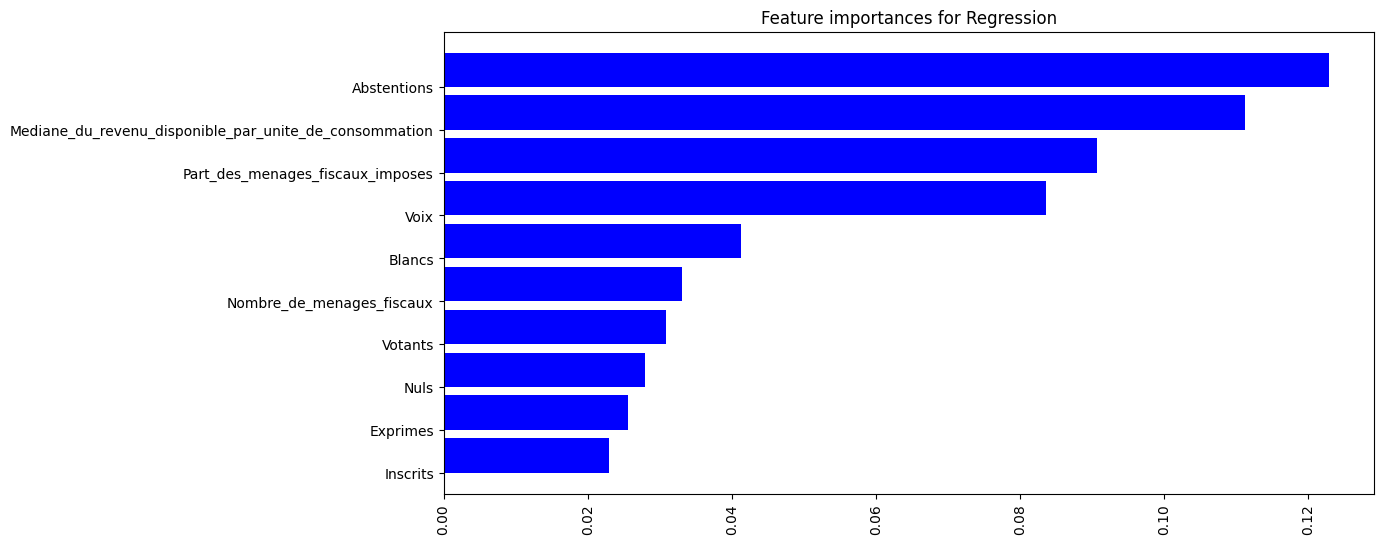

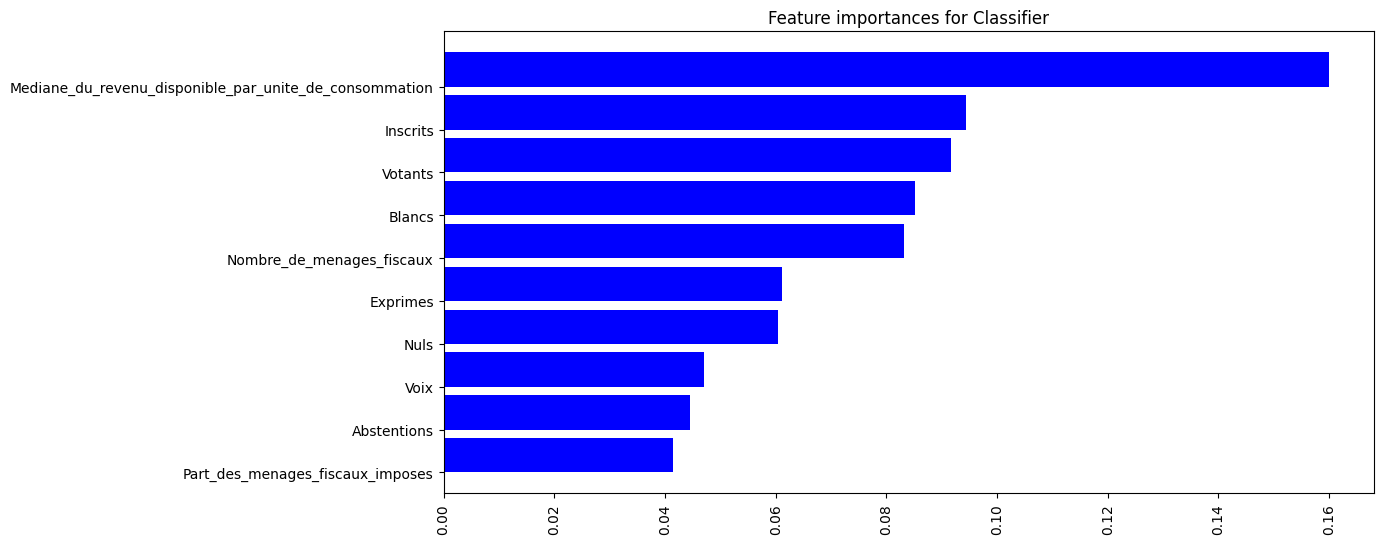

In [5]:
# Pour afficher un graphique des importances des caractéristiques triées

# Obtenir les importances des caractéristiques
regressionImportances = modelRegression.feature_importances_
classifierImportances = modelClassifier.feature_importances_

# Créer un DataFrame pour les afficher
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance Regression': regressionImportances,
    'Importance Classifier': classifierImportances
})

# Trier les importances des caractéristiques par ordre croissant
feature_importances.sort_values(by=['Importance Regression'], inplace=True)
feature_importances.sort_values(by=['Importance Classifier'], inplace=True)
feature_importances = feature_importances.sort_values('Importance Regression', ascending=False)
# Afficher les importances des caractéristiques triées
#print(feature_importances)



feature_importances = feature_importances.sort_values('Importance Regression', ascending=True)
feature_importances = feature_importances.head(10)

plt.figure(figsize=(12, 6))
plt.title("Feature importances for Regression")
plt.barh( feature_importances['Feature'], feature_importances['Importance Regression'], color='b', align="edge")
plt.xticks(rotation=90)
plt.show()

feature_importances = feature_importances.sort_values('Importance Classifier', ascending=True)
feature_importances = feature_importances.head(10)

plt.figure(figsize=(12, 6))
plt.title("Feature importances for Classifier")
plt.barh( feature_importances['Feature'], feature_importances['Importance Classifier'], color='b', align="edge")
plt.xticks(rotation=90)
plt.show()

In [6]:
import matplotlib.pyplot as plt

# A refaire par rapport aux features les plus importzntes

# Créer une liste pour les positions des barres
top_feature = (feature_importances.head(1).Feature.values[0])
# Créer une liste pour les noms des départements
labels_regions = [f"{region}" for region in regions]

# Créer une liste pour les noms des candidats prédits
labels_candidats = y_name_pred.tolist()

# Créer une liste pour les taux de pauvreté
most_imp_feature = []

# Parcourir chaque département
for region in regions:
    # Filtrer les données pour le département spécifié
    filtered_data = data[data['Region'] == region]
    # Récupérer le taux de pauvreté pour le département spécifié
    #if (filtered_data[top_feature].iloc[0] > 0) :
    most_imp_feature.append(filtered_data[top_feature].iloc[0])
    
positions = range(len(regions))

display(most_imp_feature)
# Créer le diagramme à barres
plt.figure(figsize=(12, 6))
plt.bar(positions, most_imp_feature)

# Ajouter les étiquettes pour les départements et les candidats prédits
for i, position in enumerate(positions):
    plt.text(position, most_imp_feature[i] + 0.1, labels_regions[i], ha='center')
    plt.text(position, most_imp_feature[i] - 100000, labels_candidats[i], ha='center')

# Configurer les axes et le titre
plt.xticks(positions, labels_regions)
plt.xlabel("Régions")
plt.ylabel(top_feature)
plt.title(top_feature)

# Afficher le diagramme
plt.show()


[52.7, 50.6, 49.5, 51.1, 47.6, 49.8, 45.7, 63.9, 49.2, 48.5, 46.6, 49.2, 51.7]

ValueError: Image size of 1024x688768 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x600 with 1 Axes>

,Libellé de Region,Candidat prédit,Pourcentage de voix prédit
0,Auvergne-Rhone-Alpes,MACRON Emmanuel,26.425747
1,Bourgogne-Franche-Comte,LE PEN Marine,26.296616
2,Bretagne,MACRON Emmanuel,29.031292
3,Centre-Val de Loire,LE PEN Marine,26.306698
4,Corse,LE PEN Marine,26.279048
5,Grand Est,LE PEN Marine,27.784770
6,Hauts-de-France,LE PEN Marine,30.247388
7,Ile-de-France,MACRON Emmanuel,28.638087
8,Normandie,LE PEN Marine,28.041456
9,Nouvelle-Aquitaine,MACRON Emmanuel,26.717776


Text(0, 0.5, 'Number of Departments Won')

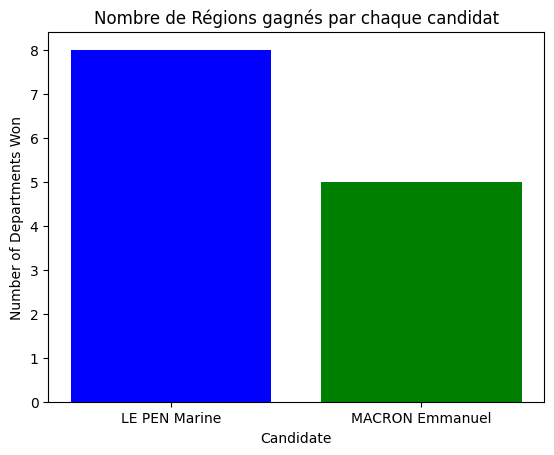

In [7]:
import matplotlib.pyplot as plt

# Compter le nombre de départements gagnés par chaque candidats
display(results)
candidate_counts = results['Candidat prédit'].value_counts()

# Definir une couleur
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Créer le diagramme de barres
plt.bar(candidate_counts.index, candidate_counts.values, color=colors)

# Labelliser les axes
plt.title('Nombre de Régions gagnés par chaque candidat')
plt.xlabel('Candidate')
plt.ylabel('Number of Departments Won')

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize

import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Supprimer les avertissements
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Calculer la matrice de confusion
cm = confusion_matrix(y1_departments, y1_pred_departments)
labels_uniques = np.unique(np.concatenate((y1_departments, y1_pred_departments)))
affichage = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_uniques)
affichage.plot()

# Binariser la sortie pour ROC multiclasse
y_vrai_bin = label_binarize(y1_departments, classes=labels_uniques)
y_pred_bin = label_binarize(y1_pred_departments, classes=labels_uniques)

# Calculer la courbe ROC et l'aire sous la courbe pour une moyenne micro
taux_fp = dict()  # taux de faux positifs
taux_vp = dict()  # taux de vrais positifs
aire_sous_courbe = dict()  # aire sous la courbe ROC

taux_fp["micro"], taux_vp["micro"], _ = roc_curve(y_vrai_bin.ravel(), y_pred_bin.ravel())
aire_sous_courbe["micro"] = auc(taux_fp["micro"], taux_vp["micro"])

# Tracer la courbe ROC pour une moyenne micro
plt.figure()
lw = 2
plt.plot(taux_fp["micro"], taux_vp["micro"], color='darkorange',
         lw=lw, label='Courbe ROC moyenne micro (aire = {0:0.2f})'
               ''.format(aire_sous_courbe["micro"]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe caractéristique de fonctionnement du récepteur')
plt.legend(loc="lower right")
plt.show()




NameError: name 'y1_departments' is not defined

In [ ]:
number_of_iterations = 10
rmse = []
accuracy = []
modelRegression = GradientBoostingRegressor(n_estimators=300, max_depth=6, loss='absolute_error')
modelClassifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit your model to each bootstrap sample
for i in range(number_of_iterations):
    # Resample the data indices with replacement
    indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    
    # Il faudrait faire cela puis split en pleins de petits samples
    
    
    # Probleme car dans le batching je suis sencé lui donner des mini batchs de données
    # Or la je lui donne tout le batch d'un coup juste je shuffle les données.
    
    bootstrap_sample_X = X_train.iloc[indices]
    bootstrap_sample_Y1 = y1_train[indices]
    bootstrap_sample_Y2 = y2_train[indices]
    
    # Fit the model to the current bootstrap sample
    modelRegression.fit(bootstrap_sample_X, bootstrap_sample_Y1.ravel())  # Fit for Y1
    # Use model.predict() or other evaluation steps as needed
    
    modelClassifier.fit(bootstrap_sample_X, bootstrap_sample_Y2.ravel())  # Fit for Y2
    # Use model.predict() or other evaluation steps as needed

    y_pred = modelRegression.predict(X_dev)
    y_name_pred = modelClassifier.predict(X_dev)
    
    rmse.append(np.sqrt(mean_squared_error(y1_dev, y_pred)))
                    
    accuracy.append(accuracy_score(y2_dev, y_name_pred))
    
    print(f"Test number {i}")
    print("Accuracy for candidate prediction:", accuracy_score(y2_dev, y_name_pred))
    print("RMSE for vote percentage prediction:", np.sqrt(mean_squared_error(y1_dev, y_pred)))


print("------- --------- --------")
print("Average RMSE: ",sum(rmse)/number_of_iterations)
print("Accuracy moyen :",sum(accuracy)/number_of_iterations)